In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras

In [ ]:
from google.colab import files
upload = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
dataset= pd.read_csv('framingham.csv')

In [ ]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.shape

(4238, 16)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Data Pre-processing**

In [ ]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('Since the number of rows with missing values are only',round((count/len(dataset.index))*100), '% of the entire dataset given, we decide to drop the rows with the missing or NaN values.')

Total number of rows with missing values is  582
Since the number of rows with missing values are only 14 % of the entire dataset given, we decide to drop the rows with the missing or NaN values.


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
dataset.shape

(3656, 16)

In [ ]:
dataset.mean()

male                 0.443654
age                 49.557440
education            1.979759
currentSmoker        0.489059
cigsPerDay           9.022155
BPMeds               0.030361
prevalentStroke      0.005744
prevalentHyp         0.311543
diabetes             0.027079
totChol            236.873085
sysBP              132.368025
diaBP               82.912062
BMI                 25.784185
heartRate           75.730580
glucose             81.856127
TenYearCHD           0.152352
dtype: float64

Removing outliers

<Axes: >

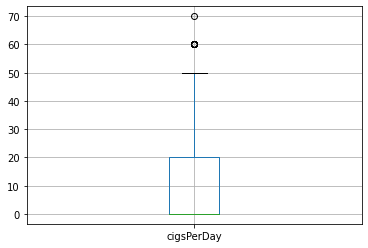

In [ ]:
dataset.boxplot(column='cigsPerDay')

In [ ]:
dataset.loc[dataset['cigsPerDay'] > 59, 'cigsPerDay'] = 9.02

<Axes: >

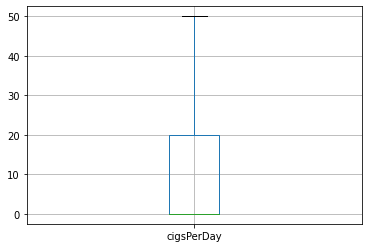

In [ ]:
dataset.boxplot(column='cigsPerDay') #after removing outliers

In [ ]:
dataset['totChol'].describe()

count    3656.000000
mean      236.873085
std        44.096223
min       113.000000
25%       206.000000
50%       234.000000
75%       263.250000
max       600.000000
Name: totChol, dtype: float64

<Axes: >

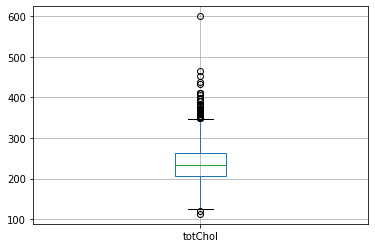

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset.loc[dataset['totChol'] > 480, 'totChol'] = 237

<Axes: >

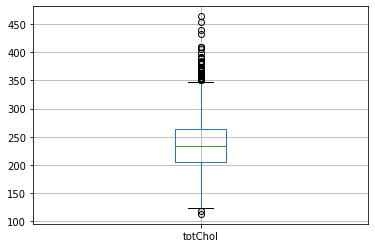

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset['sysBP'].describe()

count    3656.000000
mean      132.368025
std        22.092444
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

<Axes: >

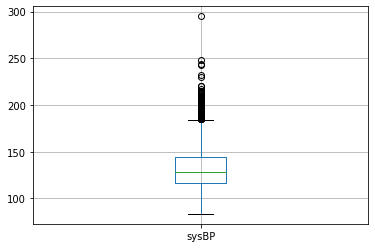

In [ ]:
dataset.boxplot(column='sysBP')

In [ ]:
dataset.loc[dataset['sysBP'] > 270, 'sysBP'] = dataset['sysBP'].median()

<Axes: >

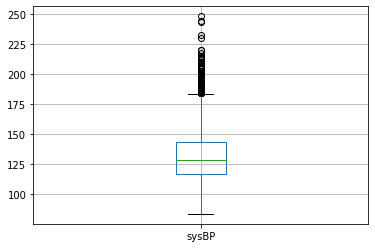

In [ ]:
dataset.boxplot(column='sysBP') #After removing the outliers

In [ ]:
dataset['BMI'].describe()

count    3656.000000
mean       25.784185
std         4.065913
min        15.540000
25%        23.080000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

<Axes: >

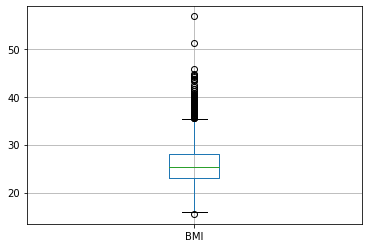

In [ ]:
dataset.boxplot(column='BMI')

In [ ]:
dataset.loc[dataset['BMI'] > 49, 'BMI'] = dataset['BMI'].median()

<Axes: >

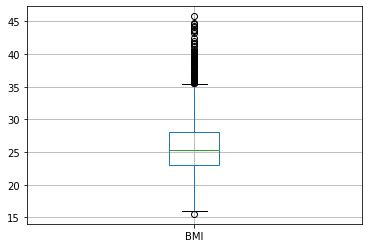

In [ ]:
dataset.boxplot(column='BMI') #After removing the outliers

In [ ]:
dataset['heartRate'].describe()

count    3656.000000
mean       75.730580
std        11.982952
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64

<Axes: >

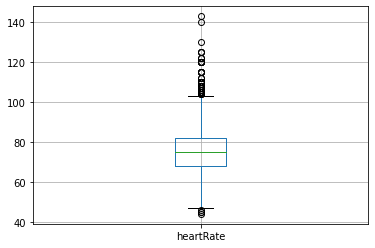

In [ ]:
dataset.boxplot(column='heartRate')

In [ ]:
dataset['glucose'].describe()

count    3656.000000
mean       81.856127
std        23.910128
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

<Axes: >

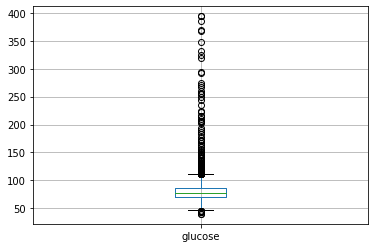

In [ ]:
dataset.boxplot(column='glucose')

Above we observed that the Glucose level and Heart Rate have not been changed although their boxplots show some outliers, i.e., becuase these levels differ variedly from person to person and can be too high or too low depending upon the person's health.

In [ ]:
dataset['TenYearCHD'].value_counts() #Return the count of unique elements in TenYearCHD column

0    3099
1     557
Name: TenYearCHD, dtype: int64

**Forward Feature Selection for Classification Problem**


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = dataset.columns.tolist()
for column in cols:
    if dataset[column].dtype == 'object':
        dataset[column] = le.fit_transform(dataset[column])

In [ ]:
X = dataset.iloc[:,0:-1]
y = dataset["TenYearCHD"]

In [ ]:
feature_names = tuple(X.columns)
feature_names

('male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose')

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [ ]:
sfs1 = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=1000),
           k_features='best',
           forward=True,
           floating=False,
           verbose=2, #to check how the model is fitting
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # based on accuracy metric, select best features
           cv=0)

sfs1 = sfs1.fit(X, y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished

[2023-03-28 07:17:18] Features: 1/15 -- score: 0.8492888402625821[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2023-03-28 07:17:18] Features: 2/15 -- score: 0.8498358862144421[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.4s finished

[2023-03-28 07:17:20] Features: 3/15 -- score: 0.850109409190372[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [ ]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (14,),
  'cv_scores': array([0.84928884]),
  'avg_score': 0.8492888402625821,
  'feature_names': ('glucose',)},
 2: {'feature_idx': (5, 14),
  'cv_scores': array([0.84983589]),
  'avg_score': 0.8498358862144421,
  'feature_names': ('BPMeds', 'glucose')},
 3: {'feature_idx': (3, 5, 14),
  'cv_scores': array([0.85010941]),
  'avg_score': 0.850109409190372,
  'feature_names': ('currentSmoker', 'BPMeds', 'glucose')},
 4: {'feature_idx': (3, 4, 5, 14),
  'cv_scores': array([0.85010941]),
  'avg_score': 0.850109409190372,
  'feature_names': ('currentSmoker', 'cigsPerDay', 'BPMeds', 'glucose')},
 5: {'feature_idx': (3, 4, 5, 6, 14),
  'cv_scores': array([0.85010941]),
  'avg_score': 0.850109409190372,
  'feature_names': ('currentSmoker',
   'cigsPerDay',
   'BPMeds',
   'prevalentStroke',
   'glucose')},
 6: {'feature_idx': (3, 4, 5, 6, 11, 14),
  'cv_scores': array([0.85038293]),
  'avg_score': 0.850382932166302,
  'feature_names': ('currentSmoker',
   'cigsPerDay',
   'B

In [ ]:
sfs1.get_metric_dict()

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (14,),
  'cv_scores': array([0.84928884]),
  'avg_score': 0.8492888402625821,
  'feature_names': ('glucose',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (5, 14),
  'cv_scores': array([0.84983589]),
  'avg_score': 0.8498358862144421,
  'feature_names': ('BPMeds', 'glucose'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (3, 5, 14),
  'cv_scores': array([0.85010941]),
  'avg_score': 0.850109409190372,
  'feature_names': ('currentSmoker', 'BPMeds', 'glucose'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (3, 4, 5, 14),
  'cv_scores': array([0.85010941]),
  'avg_score': 0.850109409190372,
  'feature_names': ('currentSmoker', 'cigsPerDay', 'BPMeds', 'glucose'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (3, 4, 5, 6, 14),
  'cv_scores': array([0.85010941]),
  'avg_score': 0.850109409190372,
  'feature_names': ('currentSmoker',
   'cigsPerDay',
  

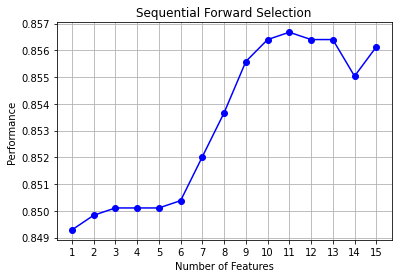

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [ ]:
# Get access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

(('age',
  'currentSmoker',
  'cigsPerDay',
  'BPMeds',
  'prevalentStroke',
  'prevalentHyp',
  'sysBP',
  'diaBP',
  'BMI',
  'heartRate',
  'glucose'),
 (1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14))

In [ ]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(14,)",0.849289
2,"(5, 14)",0.849836
3,"(3, 5, 14)",0.850109
4,"(3, 4, 5, 14)",0.850109
5,"(3, 4, 5, 6, 14)",0.850109
6,"(3, 4, 5, 6, 11, 14)",0.850383
7,"(1, 3, 4, 5, 6, 11, 14)",0.852024
8,"(1, 3, 4, 5, 6, 7, 11, 14)",0.853665
9,"(1, 3, 4, 5, 6, 7, 10, 11, 14)",0.85558
10,"(1, 3, 4, 5, 6, 7, 10, 11, 13, 14)",0.8564


In [ ]:
data2=dataset[['age','education','currentSmoker','cigsPerDay',
  'prevalentStroke',
  'prevalentHyp',
  'sysBP',
  'BMI',
  'heartRate',
  'glucose','TenYearCHD']]
data2.head()

,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,sysBP,BMI,heartRate,glucose,TenYearCHD
0,39,4.0,0,0.0,0,0,106.0,26.97,80.0,77.0,0
1,46,2.0,0,0.0,0,0,121.0,28.73,95.0,76.0,0
2,48,1.0,1,20.0,0,0,127.5,25.34,75.0,70.0,0
3,61,3.0,1,30.0,0,1,150.0,28.58,65.0,103.0,1
4,46,3.0,1,23.0,0,0,130.0,23.10,85.0,85.0,0


In [ ]:
Y2 = data2['TenYearCHD']
X2 = data2.drop(['TenYearCHD'], axis=1)

from imblearn.over_sampling import SMOTE
# Perform SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X2, Y2)

# Split the dataset into training and testing sets
train_x2, test_x2, train_y2, test_y2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x2 = scaler.fit_transform(train_x2)
test_x2 = scaler.transform(test_x2)

**Classification Algorithms**

**Extra Trees Classifier**

Accuracy: 0.9064516129032258
Precision: 0.9150326797385621
Recall: 0.8974358974358975
F1-score: 0.9061488673139159
Confusion Matrix: 
 [[564  52]
 [ 64 560]]


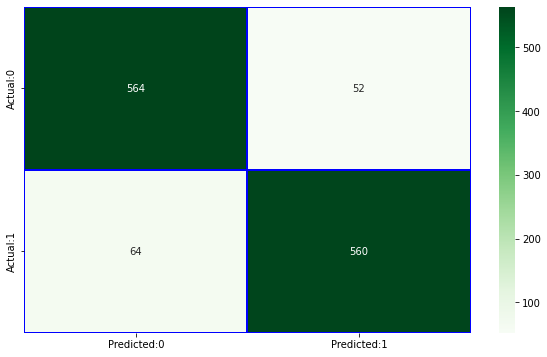

In [ ]:
# Train the Extra Trees Classifier on the training data
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf1.fit(train_x2, train_y2)

# Predict on the test data
y_pred1 = clf1.predict(test_x2)

from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
acc1 = accuracy_score(test_y2, y_pred1)
print('Accuracy:', acc1)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision1 = precision_score(test_y2, y_pred1)
recall1 = recall_score(test_y2, y_pred1)
f1_1 = f1_score(test_y2, y_pred1)

# Print the results
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_1)

conf_mat1 = confusion_matrix(test_y2, y_pred1)
print('Confusion Matrix: \n', conf_mat1)

#Plotting the confusion matrix
conf_matrix1 = pd.DataFrame(data = conf_mat1,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix1, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()



**Bagging Classifier**

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7290322580645161
Precision: 0.7136498516320475
Recall: 0.7708333333333334
F1-score: 0.741140215716487
Confusion Matrix: 
 [[423 193]
 [143 481]]


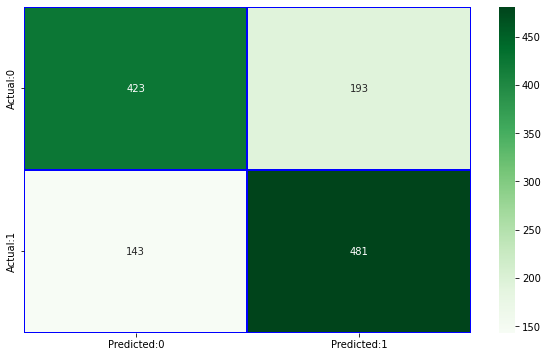

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=4)

# Define the Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the Bagging Classifier to the training data
bagging_clf.fit(train_x2, train_y2)

# Predict the target on the test data
y_pred2 = bagging_clf.predict(test_x2)

# Calculate the accuracy, precision, recall, and F1-score
accuracy2 = accuracy_score(test_y2, y_pred2)
precision2 = precision_score(test_y2, y_pred2)
recall2 = recall_score(test_y2, y_pred2)
f1_2 = f1_score(test_y2, y_pred2)

# Print the results
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_2)

conf_mat2 = confusion_matrix(test_y2, y_pred2)
print('Confusion Matrix: \n', conf_mat2)

#Plotting the confusion matrix
conf_matrix2 = pd.DataFrame(data = conf_mat2,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix2, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()



**CNN**

Epoch 1/10
124/124 [==============================] - 2s 6ms/step - loss: 0.6663 - accuracy: 0.5877 - val_loss: 0.6049 - val_accuracy: 0.6825
Epoch 2/10
124/124 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.6828 - val_loss: 0.5668 - val_accuracy: 0.7107
Epoch 3/10
124/124 [==============================] - 0s 3ms/step - loss: 0.5886 - accuracy: 0.6921 - val_loss: 0.5834 - val_accuracy: 0.6875
Epoch 4/10
124/124 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7032 - val_loss: 0.5857 - val_accuracy: 0.6865
Epoch 5/10
124/124 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7103 - val_loss: 0.5594 - val_accuracy: 0.7117
Epoch 6/10
124/124 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7173 - val_loss: 0.5648 - val_accuracy: 0.7117
Epoch 7/10
124/124 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7186 - val_loss: 0.5987 - val_accuracy: 0.6724
Epoch 

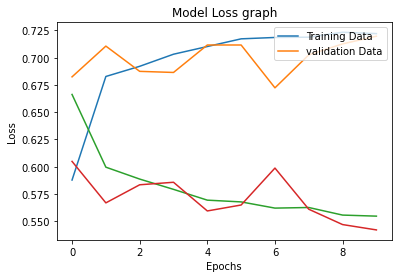

In [ ]:
model3 = keras.Sequential([
    #keras.layers.Flatten(input_shape =(13,)),
    keras.layers.Dense(60, activation = 'relu', input_shape= (10,)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(2,activation = 'sigmoid' )
])

#compiling the network

model3.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

#training the neural network
history = model3.fit(train_x2, train_y2, validation_split=0.2, epochs = 10)

#Visualizing Accuracy and Losses
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'lower right')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'upper right')

#model evaluation
loss, accuracy3 = model3.evaluate(test_x2, test_y2)
print(accuracy3)

from sklearn.metrics import classification_report, confusion_matrix
# Predict labels for test set
y_pred3 = model3.predict(test_x2)
y_pred3 = np.argmax(y_pred3, axis=1)

# Calculate precision, recall, F1 score, and support
target_names = ['class 0', 'class 1']
print(classification_report(test_y2, y_pred3, target_names=target_names))

# Calculate confusion matrix
print(confusion_matrix(test_y2, y_pred3))



**Logistic Regression**

Training accuracy: 0.681726502622025
Testing accuracy: 0.675
Confusion Matrix: 
 [[419 197]
 [206 418]]
Accuracy:  0.675
Precision: 0.6796747967479675
Recall: 0.6698717948717948
F1-score: 0.6747376916868443
Classification Report is:

               precision    recall  f1-score   support

           0       0.67      0.68      0.68       616
           1       0.68      0.67      0.67       624

    accuracy                           0.68      1240
   macro avg       0.68      0.68      0.67      1240
weighted avg       0.68      0.68      0.67      1240



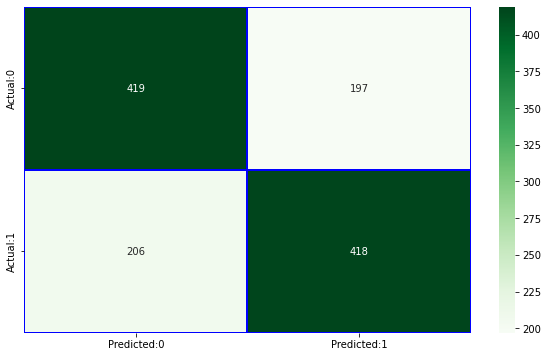

In [ ]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(train_x2, train_y2) #Training the data

from sklearn.metrics import accuracy_score
# Evaluate the model on the training set
train_preds4 = model4.predict(train_x2)
train_acc4 = accuracy_score(train_y2, train_preds4)

# Evaluate the model on the testing set
test_preds4 = model4.predict(test_x2)
test_acc4 = accuracy_score(test_y2, test_preds4)

# Print the training and testing accuracies
print("Training accuracy:", train_acc4)
print("Testing accuracy:", test_acc4)

# Make predictions on the testing data
y_pred4 = model4.predict(test_x2)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
conf_mat4 = confusion_matrix(test_y2, y_pred4)
acc4 = accuracy_score(test_y2, y_pred4)
print('Confusion Matrix: \n', conf_mat4)
print('Accuracy: ', acc4)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision4 = precision_score(test_y2, y_pred4)
recall4 = recall_score(test_y2, y_pred4)
f1_4 = f1_score(test_y2, y_pred4)

# Print the results
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f1_4)

from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report is:\n\n",classification_report(test_y2,y_pred4))  #classification report

#Plotting the confusion matrix
conf_matrix4 = pd.DataFrame(data = conf_mat4,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix4, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()


**Decision Tree**

In [ ]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x2,train_y2)
dt_predicted = dt.predict(test_x2)
dt_conf_matrix = confusion_matrix(test_y2, dt_predicted)
dt_acc_score = accuracy_score(test_y2, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y2,dt_predicted))

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision5 = precision_score(test_y2, dt_predicted)
recall5 = recall_score(test_y2, dt_predicted)
f1_5 = f1_score(test_y2, dt_predicted)

# Print the results
print("Precision:", precision5)
print("Recall:", recall5)
print("F1-score:", f1_5)

confussion matrix
[[491 125]
 [108 516]]


Accuracy of DecisionTreeClassifier: 81.20967741935485 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       616
           1       0.80      0.83      0.82       624

    accuracy                           0.81      1240
   macro avg       0.81      0.81      0.81      1240
weighted avg       0.81      0.81      0.81      1240

Precision: 0.8049921996879875
Recall: 0.8269230769230769
F1-score: 0.8158102766798419


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
m6 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x2,train_y2)
gvc_predicted = gvc.predict(test_x2)
gvc_conf_matrix = confusion_matrix(test_y2, gvc_predicted)
gvc_acc_score = accuracy_score(test_y2, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y2,gvc_predicted))


# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision6 = precision_score(test_y2, gvc_predicted)
recall6 = recall_score(test_y2, gvc_predicted)
f1_6 = f1_score(test_y2, gvc_predicted)

# Print the results
print("Precision:", precision6)
print("Recall:", recall6)
print("F1-score:", f1_6)

confussion matrix
[[565  51]
 [157 467]]


Accuracy of Gradient Boosting Classifier: 83.22580645161291 

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       616
           1       0.90      0.75      0.82       624

    accuracy                           0.83      1240
   macro avg       0.84      0.83      0.83      1240
weighted avg       0.84      0.83      0.83      1240

Precision: 0.9015444015444015
Recall: 0.7483974358974359
F1-score: 0.8178633975481612


**XGBOOST**

In [ ]:
import xgboost as xgb
# Create an XGBoost classifier
clf7 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=6, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

# Train the classifier
clf7.fit(train_x2, train_y2)

# Make predictions on the test set
y_pred7 = clf7.predict(test_x2)

# Evaluate the performance of the classifier
accuracy7 = accuracy_score(test_y2, y_pred7)
print('Accuracy:', accuracy7)

cm7 = confusion_matrix(test_y2, y_pred7)
print('Confusion matrix:\n', cm7)

cr7 = classification_report(test_y2, y_pred7)
print('Classification report:\n', cr7)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision7 = precision_score(test_y2, y_pred7)
recall7 = recall_score(test_y2, y_pred7)
f1_7 = f1_score(test_y2, y_pred7)

# Print the results
print("Precision:", precision7)
print("Recall:", recall7)
print("F1-score:", f1_7)

Accuracy: 0.8701612903225806
Confusion matrix:
 [[555  61]
 [100 524]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       616
           1       0.90      0.84      0.87       624

    accuracy                           0.87      1240
   macro avg       0.87      0.87      0.87      1240
weighted avg       0.87      0.87      0.87      1240

Precision: 0.8957264957264958
Recall: 0.8397435897435898
F1-score: 0.8668320926385442


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier with 100 trees
clf8 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf8.fit(train_x2, train_y2)

# Make predictions on the test set
y_pred8 = clf8.predict(test_x2)

# Evaluate the performance of the classifier
accuracy8 = accuracy_score(test_y2, y_pred8)
print('Accuracy:', accuracy8)

cm8 = confusion_matrix(test_y2, y_pred8)
print('Confusion matrix:\n', cm8)

cr8 = classification_report(test_y2, y_pred8)
print('Classification report:\n', cr8)


# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision8 = precision_score(test_y2, y_pred8)
recall8 = recall_score(test_y2, y_pred8)
f1_8 = f1_score(test_y2, y_pred8)

# Print the results
print("Precision:", precision8)
print("Recall:", recall8)
print("F1-score:", f1_8)

Accuracy: 0.8951612903225806
Confusion matrix:
 [[573  43]
 [ 87 537]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       616
           1       0.93      0.86      0.89       624

    accuracy                           0.90      1240
   macro avg       0.90      0.90      0.90      1240
weighted avg       0.90      0.90      0.90      1240

Precision: 0.9258620689655173
Recall: 0.8605769230769231
F1-score: 0.8920265780730897


In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict

### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier
### importing breast Cancer Dataset from sklearn
from sklearn.datasets import load_breast_cancer
### spliting dataset into training and testing part
from sklearn.model_selection import train_test_split

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(train_x2, test_x2, train_y2, test_y2)

100%|██████████| 29/29 [00:30<00:00,  1.06s/it]


In [ ]:
models # Results using all the features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.91,0.91,0.91,0.91,0.67
RandomForestClassifier,0.89,0.89,0.89,0.89,2.01
XGBClassifier,0.88,0.88,0.88,0.88,10.42
LGBMClassifier,0.88,0.88,0.88,0.88,2.93
BaggingClassifier,0.87,0.87,0.87,0.87,0.31
LabelPropagation,0.84,0.84,0.84,0.84,1.22
LabelSpreading,0.84,0.84,0.84,0.84,1.81
DecisionTreeClassifier,0.81,0.81,0.81,0.81,0.06
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.51
